In [6]:
from commonfunctions import *
from skimage.filters import threshold_otsu

In [24]:
TEMPLATES_PATH = 'templates/'
LINE_THRESH = 0.8
STAFF_COUNT = 5

In [7]:
def get_gray(img):
    gray = rgb2gray(np.copy(img))
    return gray
def get_thresholded(img, thresh):
    return 1*(img > thresh)

In [12]:
def histogram(img, thresh):
    hist = (np.ones(img.shape) - img).sum(dtype=np.int32, axis=1)
    _max = np.amax(hist)
    hist[hist[:] < _max * thresh] = 0
    return hist

In [14]:
def get_line_indices(hist):
    indices = []
    prev = 0
    for index, val in enumerate(hist):
        if val > 0 and prev <= 0:
            indices.append(index)
        prev = val
    return indices

In [15]:
def get_line_height(hist):
    heights = []
    start_indices = get_line_indices(hist)
    for index in start_indices:
        end_idx = index + 1
        while hist[end_idx] > 0:
            end_idx += 1
        heights.append(end_idx-index)
    return max(heights)

In [19]:
def get_space_height(line_height, hist):
    heights = []
    line_indices = get_line_indices(hist)
    prev = -1
    count_lines = 0
    for line_index in line_indices:
        count_lines += 1
        if prev > 0:
            heights.append(line_index-prev-line_height+1)
        prev = line_index

        if count_lines >= 5:
            count_lines = 0
            prev = -1
    
    return np.average(heights)

In [22]:
def get_line_info(img):
    hist = histogram(img, LINE_THRESH)
    line_height = get_line_height(hist)
    space_height = get_space_height(line_height, hist)
    print(line_height)
    print(space_height)
    return line_height + space_height

In [26]:
def find_staff_lines(hist):
    staffs = []
    idx = 0
    line_indices = get_line_indices(hist)
    while idx < len(line_indices):
        staff = []
        for _ in range(STAFF_COUNT):
            staff.append(line_indices[idx])
            idx += 1
        staffs.append(staff)
    return staffs

In [27]:
def get_line_index(start, pos, dir, line_height):
    return start+int(round(dir*pos*line_height))

In [28]:
def get_staff(hist, line_height, helpers=True):
    staffs = find_staff_lines(hist)
    if not helpers:
        return staffs
    
    staffs_with_helpers = []
    max_helpers = 4
    for staff in staffs:
        lines = [get_line_index(staff[0], i, -1, line_height) for i in range(max_helpers, 0, -1) + staff + get_line_index(staff[-1], i, 1, line_height) for i in range(1, max_helpers+1)]
        staffs_with_helpers.append(lines)

In [ ]:
def remove_staff_line(index, img):
    

In [ ]:
def remove_staffs(img, hist, line_height):
    img_without_staffs = np.array(img)
    for staff in get_staff(hist, line_height):
        for index in staff:
            if index <= 0 or index >= img_without_staffs.shape[0]:
                continue
            

2
11.5625
13.5625


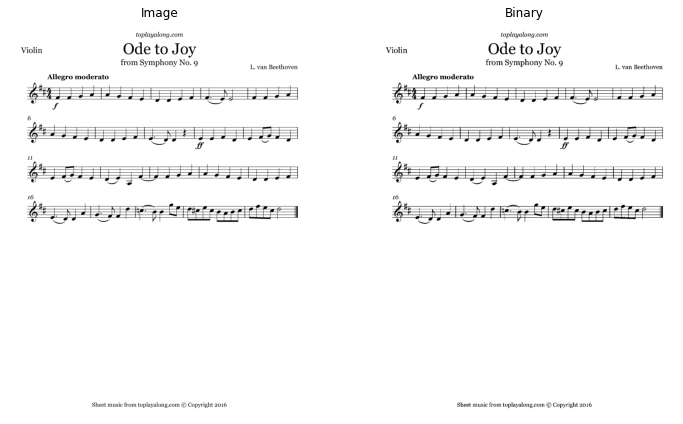

In [23]:
image = io.imread('dataset/ode.png')
gray = get_gray(image)
binary_img = get_thresholded(gray, threshold_otsu(gray))
line_height = get_line_info(binary_img)

print(line_height)
show_images([image, binary_img], ['Image', 'Binary'])
# rows, cols = image.shape[:2]